In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [3]:
df = pd.read_csv("StudentsPerformance.csv")
print(df.head())



   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [5]:
print(df.describe())

       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000


In [6]:
# Encode categorical variables
encoder = LabelEncoder()
df["gender"] = encoder.fit_transform(df["gender"])
df["race/ethnicity"] = encoder.fit_transform(df["race/ethnicity"])
df["parental level of education"] = encoder.fit_transform(df["parental level of education"])
df["lunch"] = encoder.fit_transform(df["lunch"])
df["test preparation course"] = encoder.fit_transform(df["test preparation course"])

# Create target variable: classify as Pass (>=50) or Fail (<50)
df["pass"] = (df["math score"] >= 50).astype(int)
df.drop(columns=["math score"], inplace=True)  # Drop original math score


In [7]:
X = df.drop(columns=["pass"])  # Features
y = df["pass"]  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_preds = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_preds))


Decision Tree Accuracy: 0.86


In [9]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_preds = lr_model.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_preds))


Logistic Regression Accuracy: 0.885


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.50      0.55        34
           1       0.90      0.93      0.92       166

    accuracy                           0.86       200
   macro avg       0.75      0.72      0.73       200
weighted avg       0.85      0.86      0.85       200

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.59      0.63        34
           1       0.92      0.95      0.93       166

    accuracy                           0.89       200
   macro avg       0.80      0.77      0.78       200
weighted avg       0.88      0.89      0.88       200



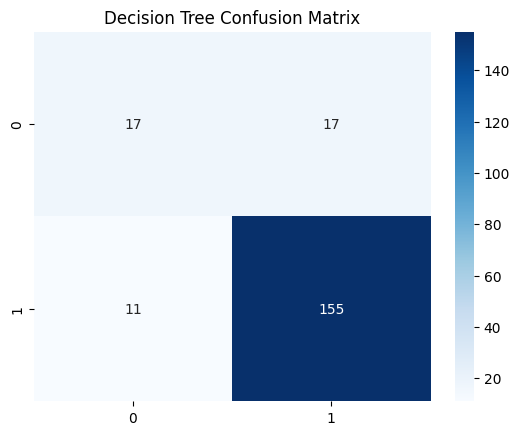

In [10]:
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_preds))
print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

# Confusion Matrix
sns.heatmap(confusion_matrix(y_test, dt_preds), annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.show()
